# Homework 1: Aircraft inventory analysis

In this homework, we will explore the aircraft inventory dataset from 2006 to 2023 (Source: Bureau of Transportation Statistics, www.bts.gov).  

**Some useful resources:**
- You may find explanation of the dataset attributes available in [BTS dataset attribute summary](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=GEH).
- You may verify some of your analyses by comparing your results with the BTS analysis dashboard.  The dashboard is reachable via the "Analysis" column in the attribute summary linked above.

**General rules of thumb for homeworks:**
- Read the homework questions carefully.
- Explain your choices.
- Present your findings concisely.
- Use tables, plots, and summary statistics to aid your presentation of findings.
- If you have an idea in mind but could not implement (in code), present the idea thoroughly and how you would have implemented the code. 

### Tasks:

For all tasks below, create one or more functions for any systematic changes to the dataset.  For instance, someone could run the sequence of functions to transform the dataset.

Specify the sequence of functions.

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

2. Inspect the columns `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`.  Decide, for each column, if transformation or standardization of data are required.  Give your reasoning and code if you decide to transform the data.  

    **Hints:**
    - For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
    - Use `value_counts()` to identify "big wins".
    - Break down into multiple steps, instead of having one line of code to do them all.

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

4. Transformation and derivative variables
   - For the columns `NUMBER_OF_SEATS` and `CAPACITY_IN_POUNDS`, check the skewness in the variable and plot a histogram for each variable.
   - The Box-Cox transformation (`scipy.stats.boxcox`) is one possible way to transform variables into a "more-normal-like" variable.  Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. `XXXXXXXXX_BOXCOX`.
   - Plot a histogram for each transformed variable.
   - Describe what you observe before and after transformation.

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

### Dataset
You may read in the dataset with the following code.  Otherwise, you can find the [dataset](https://github.com/mosesyhc/de300-2026wi/raw/refs/heads/main/datasets/T_F41SCHEDULE_B43.zip) available in the `dataset` directory.  *Note* that `pandas.read_csv()` is capable of reading a zipped .csv file and no unzipping is required.

In [6]:
import pandas as pd
inventory = pd.read_csv('homework_1/T_F41SCHEDULE_B43.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'homework_1/T_F41SCHEDULE_B43.csv'

In [4]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

### Task 1

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

In [3]:
inventory.head()

NameError: name 'inventory' is not defined

In [38]:
inventory['UNIQUE_CARRIER'].unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'KH', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX (1)', 'ZQ', 'ZW', 'CP',
       'E9', 'EZ', 'FE', nan, 'YX', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', 'L3', '0JQ', '0WQ', 'PM', '5V', 'N8', 'OH (1)', 'PT (1)',
       '09Q', '1BQ', '1EQ', 'K8', 'RP', '1TQ', 'WP', '20Q', 'KD', '23Q',
       '27Q', 'EE', '2HQ', '2PQ', 'WL', '34Q', '37Q', '3EQ', 'C5', '3FQ',
       '3M', 'GCA', 'MX'], dtype=object)

In [39]:
inventory['CARRIER'].unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'AQ', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX', 'ZQ', 'ZW', 'CP', 'E9',
       'EZ', 'FE', 'L4', nan, 'RW', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', '0JQ', '0WQ', '16 ', '3Z ', '5X ', '5Y ', '8C ', '9E ',
       '9L ', '9S ', 'AA ', 'AQ ', 'AS ', 'B6 ', 'CO ', 'CP ', 'CS ',
       'DL ', 'ER ', 'EV ', 'EZ ', 'F9 ', 'FL ', 'FX ', 'G4 ', 'G7 ',
       'GL ', 'HA ', 'JW ', 'L2 ', 'L3 ', 'M6 ', 'MQ ', 'NA ', 'NC ',
       'NK ', 'NW ', 'OH ', 'OO ', 'OW ', 'PM ', 'PO ', 'PT ', 'QX ',
       'RD ', 'S5 ', 'SI ', 'SY ', 'U5 ', 'U7 ', 'UA ', 'US ', 'VX ',
   

In [36]:


def investigate(column):
    ''' 
    Investigates a column of a dataframe. 
    Prints out basic information. 
    Checks if the column in numeric to see if missing data can be imputed.
    '''

    # print basic information
    print(f"Column: {column.name}")
    print(f"Data type: {column.dtype}")
    print(f"Sample values: {column.unique()[:5]}") 
    print(f"Number of unique values: {column.nunique()}")

    # why would we not be able to impute missing data? if non-numeric
    if column.dtype == 'object':
        print('Cannot impute missing data for non-numeric columns.\n')
        return
    
    print(f"Number of missing values: {column.isnull().sum()}")
    print("Go ahead and impute.\n")






def impute_numeric_knn(df):
    '''
    Given a dataframe, selects the numeric columns and imputes missing data. 
    Uses KNN imputation with 5 neighbors.
    Plots the imputed data in individual bar charts for each column. 
    Returns imputed dataframe
    '''

    from sklearn.impute import KNNImputer

    numeric_columns = df.select_dtypes(include=['number']).columns
    imputer = KNNImputer(n_neighbors=5)
    df_numeric = df[numeric_columns]
    imputed_data = imputer.fit_transform(df_numeric)
    df_imputed = df.copy()
    df_imputed[numeric_columns] = imputed_data

    # plot imputed data
    import matplotlib.pyplot as plt
    for column in numeric_columns:
        plt.figure()
        plt.title(f'Imputed values for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.hist(df_imputed[column], bins=30, alpha=0.7, label='Imputed')
        plt.legend()
        plt.show()

    return df_imputed
    

Column: AIRLINE_ID
Data type: float64
Sample values: [20397. 20408. 19917. 20007. 19874.]
Number of unique values: 112
Number of missing values: 105
Go ahead and impute.



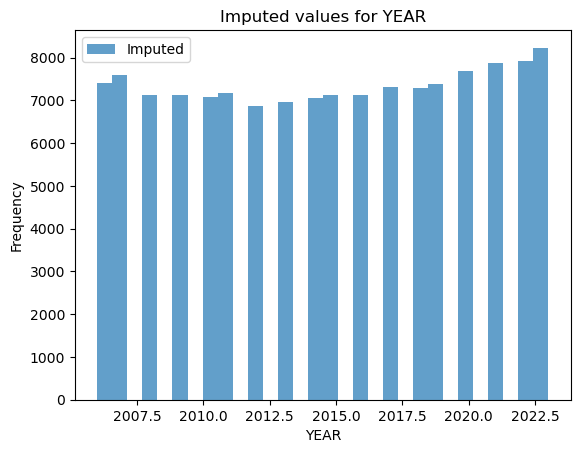

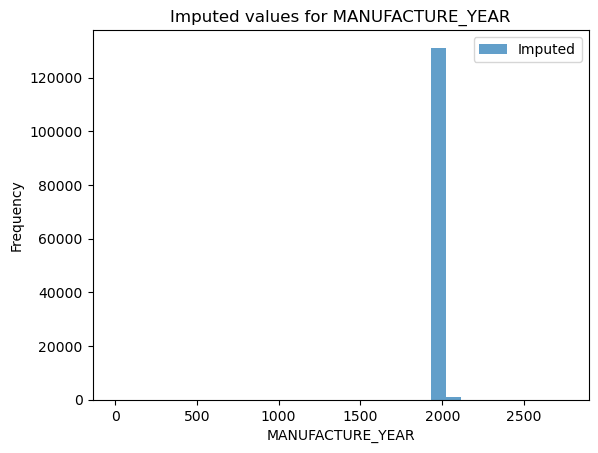

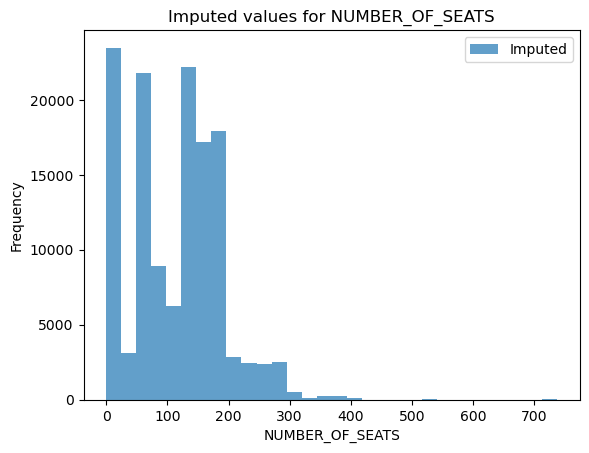

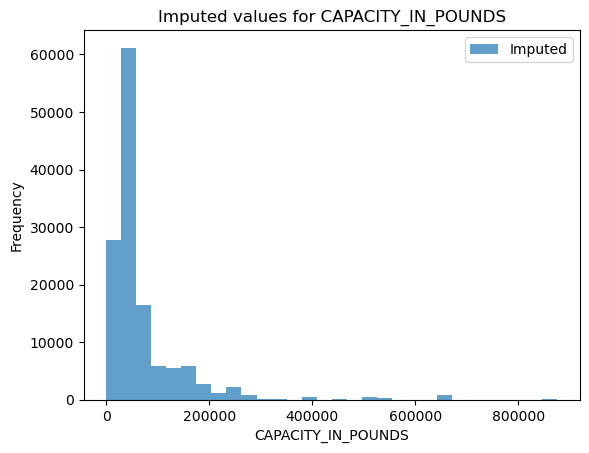

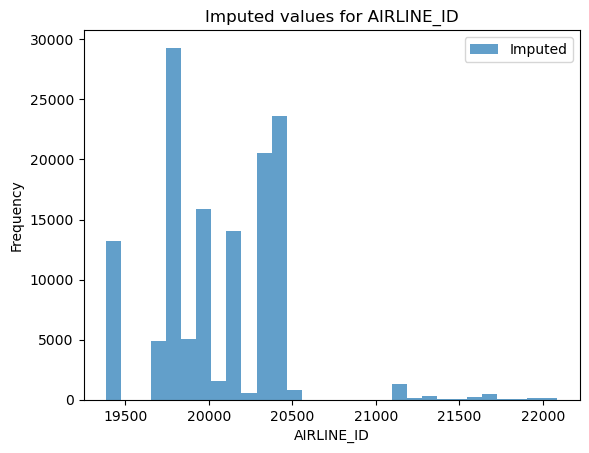

In [37]:
# choose from `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`

investigate(inventory['AIRLINE_ID'])

inventory_imputed = impute_numeric_knn(inventory)


### Task 3

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

In [84]:

def remove_missing_data_rows(df):
    clean_df = df.copy()
    print(f'Number of missing rows:\n{df.isnull().sum()}')
    print(f'\nOriginal shape: {df.shape}')
    clean_df = clean_df.dropna(axis=0, how='any') # drop whole rows
    print(f'New shape: {clean_df.shape}')
    return clean_df



In [85]:
inventory_copy = inventory.copy()

inventory_clean = remove_missing_data_rows(inventory_copy)

Number of missing rows:
YEAR                       0
CARRIER                   49
CARRIER_NAME             105
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME      105
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID               105
UNIQUE_CARRIER           164
SIZE                       7
dtype: int64

Original shape: (132313, 18)
New shape: (101167, 18)


### Task 5

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

In [55]:
inventory[inventory['NUMBER_OF_SEATS'] <= 50]['SIZE'] = 'SMALL'


/var/folders/hh/2dsrbb3d021_w0zs6jdygn480000gn/T/ipykernel_363/1326684792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory[inventory['NUMBER_OF_SEATS'] <= 50]['SIZE'] = 'SMALL'


In [60]:
def new_quartile_feature(df, old_feature, new_feature):

    print(f"Creating new feature '{new_feature}' from '{old_feature}' based on quartiles.")

    # create new feature
    df[new_feature] = None

    # find quartiles
    Q1 = df[old_feature].quantile(0.25)
    Q2 = df[old_feature].quantile(0.50)
    Q3 = df[old_feature].quantile(0.75)
    print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}")

    # assign new values based on quartiles
    df.loc[df[old_feature] <= Q1, new_feature] = 'SMALL'
    df.loc[(df[old_feature] > Q1) & (df[old_feature] <= Q2), new_feature] = 'MEDIUM'
    df.loc[(df[old_feature] > Q2) & (df[old_feature] <= Q3), new_feature] = 'LARGE'
    df.loc[df[old_feature] > Q3, new_feature] = 'EXTRA_LARGE'

    # plot bar plot of new feature
    import matplotlib.pyplot as plt
    plt.figure()
    plt.title(f'Bar plot of {new_feature}')
    plt.xlabel(new_feature)
    plt.ylabel('Count')
    df[new_feature].value_counts().plot(kind='bar')
    plt.show()

    

Creating new feature 'SIZE' from 'NUMBER_OF_SEATS' based on quartiles.
Q1: 50.0, Q2: 125.0, Q3: 160.0


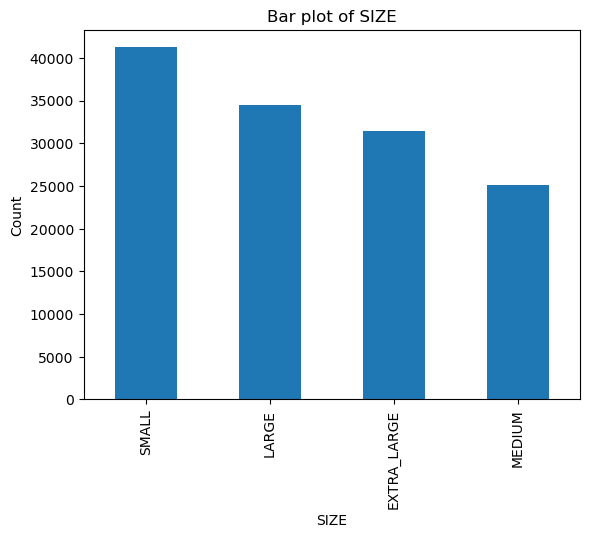

In [62]:
new_quartile_feature(inventory_imputed, 'NUMBER_OF_SEATS', 'SIZE')

# Submission guidelines
Your submission should be contained in a `homework_1` folder of your Github repository, and it should include 
- a `readme.md` file including how to run the code and what your expected outputs are (if the code is run), 
- your source code, and
- a `.pdf` or `.html` file containing your written answers.

# Generative AI disclosure

*Syllabus* policy: 

Required disclosure: each submission must include an AI Usage note stating: (1) tool(s) used, (2) the key prompt(s), and (3) what you changed and how you verified the results. If none, write: “AI Usage: None.”